In [3]:
# %lsmagic
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [1]:
import oracledb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Connect
conn = oracledb.connect(user="Ecommerce", password="Bhimd123", dsn="localhost:1521/XEPDB1")

# List tables
query = "SELECT table_name FROM user_tables"
df_tables = pd.read_sql(query, conn)
print(df_tables)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_10184\3217224499.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tables = pd.read_sql(query, conn)


    TABLE_NAME
0    CUSTOMERS
1  GEOLOCATION
2  ORDER_ITEMS
3       ORDERS
4     PRODUCTS
5     PAYMENTS
6      SELLERS


## 1. List all unique cities where customers are located.

In [2]:
query = 'SELECT count(distinct customer_city) from customers'
pd.read_sql(query, conn)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_17720\1593607165.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,COUNT(DISTINCTCUSTOMER_CITY)
0,4119


In [11]:
pd.read_sql('SELECT distinct customer_city from customers', conn).head()

C:\Users\bhimd\AppData\Local\Temp\ipykernel_17720\1490486373.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('SELECT distinct customer_city from customers', conn).head()


,CUSTOMER_CITY
0,recife
1,manaus
2,diadema
3,varre-sai
4,atibaia


### 2. Count the number of orders placed in 2017.

In [7]:
# pd.read_sql('select count(order_id) from orders where To_date(order_purchase_timestamp, 'YYYY')', conn)
query = "select count(Order_purchase_timestamp) from Orders where To_Number(To_char(Order_purchase_timestamp, 'YYYY'))=2017"
df = pd .read_sql(query, conn)
df

C:\Users\bhimd\AppData\Local\Temp\ipykernel_17720\2694235908.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd .read_sql(query, conn)


,COUNT(ORDER_PURCHASE_TIMESTAMP)
0,45101


### 3. Find the total sales per category.

In [2]:
query = '''select P.PRODUCT_CATEGORY, Count(*) from ORDER_ITEMS O Inner JOIN 
products P ON P.PRODUCT_ID=O.PRODUCT_ID 
group By P.PRODUCT_CATEGORY'''
print(pd .read_sql(query, conn))

C:\Users\bhimd\AppData\Local\Temp\ipykernel_11132\776550832.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print(pd .read_sql(query, conn))


                                    PRODUCT_CATEGORY  COUNT(*)
0                               computer accessories      7827
1                                       Garden tools      4347
2                                     bed table bath     11115
3   Furniture Kitchen Service Area Dinner and Garden       281
4                    Construction Tools Construction       929
..                                               ...       ...
69                                    Imported books        60
70                                              toys      4117
71                                             audio       364
72                            General Interest Books       553
73                          Construction Tools Tools       103

[74 rows x 2 columns]


In [9]:
query ='''select P.PRODUCT_CATEGORY, Sum(Py.PAYMENT_VALUE) Sales from ORDER_ITEMS O Inner JOIN
products P ON P.PRODUCT_ID=O.PRODUCT_ID  Inner Join payments py ON O.ORDER_ID=Py.ORDER_ID
group By P.PRODUCT_CATEGORY Order By Sales Desc'''
pd.read_sql(query, conn)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_11132\4037223111.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,PRODUCT_CATEGORY,SALES
0,bed table bath,1712553.67
1,HEALTH BEAUTY,1657373.12
2,computer accessories,1585330.45
3,Furniture Decoration,1430176.39
4,Watches present,1429216.68
...,...,...
69,PC Gamer,2174.43
70,House Comfort 2,1710.54
71,cds music dvds,1199.43
72,Fashion Children's Clothing,785.67


### 4. Calculate the percentage of orders that were paid in installments.

In [35]:
query = """Select count(Distinct Order_ID) Total_Orders from Payments"""
df= pd.read_sql(query, conn)
# Total no. of the Orders
x=int(df.iloc[0])

C:\Users\bhimd\AppData\Local\Temp\ipykernel_11132\3669672583.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query, conn)
C:\Users\bhimd\AppData\Local\Temp\ipykernel_11132\3669672583.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x=int(df.iloc[0])


In [37]:
query ="""SELECT
    ROUND(
        (COUNT(CASE WHEN max_installments > 1 THEN 1 END) * 100.0)
        / COUNT(*),
        2
    ) AS pct_orders_in_installments
FROM (
    SELECT order_id, MAX(payment_installments) AS max_installments
    FROM payments
    GROUP BY order_id
)"""
df= pd.read_sql(query, conn)
df

C:\Users\bhimd\AppData\Local\Temp\ipykernel_11132\3142847481.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query, conn)


,PCT_ORDERS_IN_INSTALLMENTS
0,51.46


### 5. Count the number of customers from each state.

In [11]:
query = '''select CUSTOMER_STATE, Count(Customer_ID) Customer_count from Customers Group By CUSTOMER_STATE Order by Customer_count desc'''
df = pd.read_sql(query, conn)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_7232\1649456873.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [12]:
df.head()

,CUSTOMER_STATE,CUSTOMER_COUNT
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


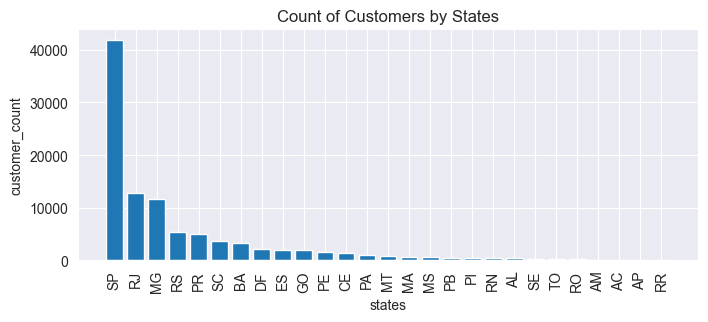

In [13]:
plt.figure(figsize = (8,3))
plt.bar(df["CUSTOMER_STATE"], df["CUSTOMER_COUNT"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

### 6. Calculate the number of orders per month in 2018.

In [17]:
query = """SELECT
    TO_CHAR(TO_DATE(Month1, 'MM'), 'Month') AS Month_Name,
    COUNT(ORDER_ID) AS Total_Orders
FROM (
    SELECT
        TO_CHAR(ORDER_PURCHASE_TIMESTAMP, 'MM') AS Month1,
        ORDER_ID
    FROM ORDERS
    WHERE TO_CHAR(ORDER_PURCHASE_TIMESTAMP, 'YYYY') = '2018'
)
GROUP BY Month1
ORDER BY Month1"""
df = pd.read_sql(query, conn)
df.head()

C:\Users\bhimd\AppData\Local\Temp\ipykernel_7232\3494663673.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,MONTH_NAME,TOTAL_ORDERS
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873


Text(0.5, 1.0, 'Count of Orders by Months is 2018')

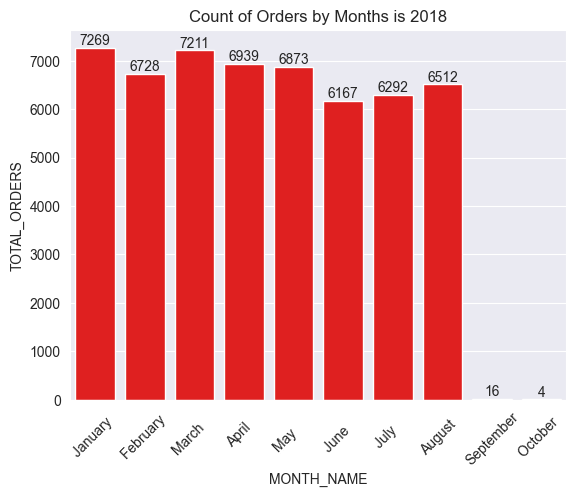

In [18]:
# o = ["January", "February","March","April","May","June","July","August","September","October"] order = o

ax = sns.barplot(x = df["MONTH_NAME"],y =  df["TOTAL_ORDERS"], data = df, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

### 7. Find the average number of products per order, grouped by customer city.

In [16]:
query = """
Select City, Round(AVG(order_item_count),2) Avg_Order from
(SELECT
        O.ORDER_ID,
        C.CUSTOMER_CITY City,
        Max(OT.ORDER_ITEM_ID) AS order_item_count
    FROM ORDER_ITEMS OT
    INNER JOIN ORDERS O
        ON OT.ORDER_ID = O.ORDER_ID
    INNER JOIN CUSTOMERS C
        ON C.CUSTOMER_ID = O.CUSTOMER_ID
    GROUP BY O.ORDER_ID, C.CUSTOMER_CITY Order By C.CUSTOMER_CITY Desc, order_item_count Desc) Group By City Order By Avg_Order Desc
"""
df = pd.read_sql(query, conn)
df.head()

C:\Users\bhimd\AppData\Local\Temp\ipykernel_7232\3471854985.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,CITY,AVG_ORDER
0,padre carvalho,7.0
1,celso ramos,6.5
2,candido godoi,6.0
3,datas,6.0
4,matias olimpio,5.0


### 8.Calculate the percentage of total revenue contributed by each product category.

In [3]:
query = """Select PRODUCT_CATEGORY, Round(sum_price/sum(sum_price) over ()*100, 2) Percentage_revenue from(
select P.PRODUCT_CATEGORY , sum(OT.PRICE) sum_price  from ORDER_ITEMS OT Inner Join PRODUCTS P ON OT.PRODUCT_ID=P.PRODUCT_ID
Group By P.PRODUCT_CATEGORY Order By P.PRODUCT_CATEGORY)"""

pd.read_sql(query, conn).head()

C:\Users\bhimd\AppData\Local\Temp\ipykernel_5892\3143037092.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn).head()


,PRODUCT_CATEGORY,PERCENTAGE_REVENUE
0,Agro Industria e Comercio,0.53
1,Art,0.18
2,Arts and Crafts,0.01
3,Bags Accessories,1.03
4,Blu Ray DVDs,0.04


### 9. Identify the correlation between product price and the number of times a product has been purchased.

In [4]:
query='''select PRODUCT_CATEGORY, Round(Avg(Price), 2) Price1, Count(OT.Product_id) Product_count from ORDER_ITEMS OT Inner Join products P ON P.PRODUCT_ID=OT.PRODUCT_ID Group By PRODUCT_CATEGORY Order By Price1'''
df = pd.read_sql(query, conn)
df.head()

C:\Users\bhimd\AppData\Local\Temp\ipykernel_5892\2916174905.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,PRODUCT_CATEGORY,PRICE1,PRODUCT_COUNT
0,House Comfort 2,25.34,30
1,flowers,33.64,33
2,Hygiene diapers,40.19,39
3,cds music dvds,52.14,14
4,Drink foods,54.60,278


In [8]:
a=np.corrcoef(df.PRICE1,df.PRODUCT_COUNT)
print("the correlation is", a[0][-1])

the correlation is -0.10631625823860699


### 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [15]:
query = """SELECT
    A.seller_id,
    A.REVENUE ,
    DENSE_RANK() OVER (ORDER BY a.REVENUE DESC) RANK
FROM (
    SELECT
        oi.seller_id,
        SUM(p.payment_value) AS REVENUE
    FROM order_items oi
    JOIN payments p
        ON oi.order_id = p.order_id
    GROUP BY oi.seller_id
) A"""
df = pd.read_sql(query, conn).head(10)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_5892\1090897124.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn).head(10)


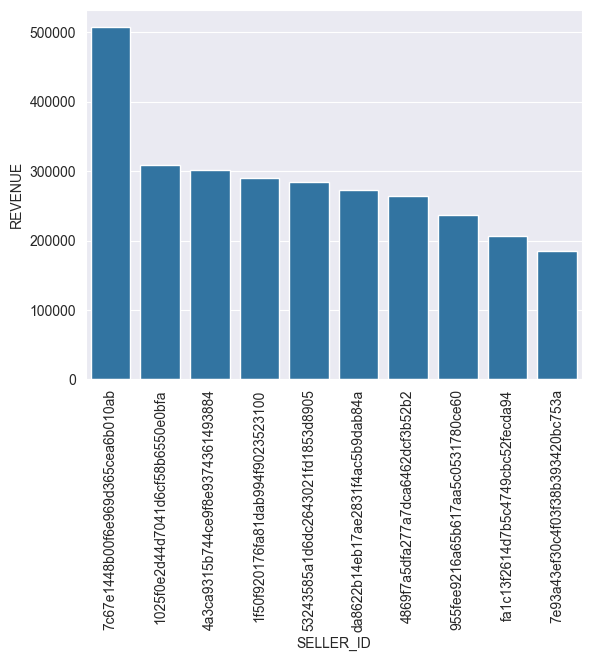

In [16]:
sns.barplot(x = "SELLER_ID", y = "REVENUE", data = df)
plt.xticks(rotation = 90)
plt.show()

### 11. Calculate the moving average of order values for each customer over their order history.

What does "moving average of order values for each customer over their order history" mean?

Order Value → The payment value of an order.

Customer’s Order History → A timeline of all orders placed by the customer.

Moving Average → Instead of just taking the average of all orders, we take the average of the most recent N orders (e.g., last 3 orders).

This helps us understand how the customer’s spending pattern changes over time.

In [19]:
query = """SELECT
    CUSTOMER_ID,
    ORDER_PURCHASE_TIMESTAMP,
    PAYMENT,
    AVG(PAYMENT) OVER(
        PARTITION BY CUSTOMER_ID
        ORDER BY ORDER_PURCHASE_TIMESTAMP
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS MOV_AVG
FROM (
    SELECT
        O.CUSTOMER_ID,
        O.ORDER_PURCHASE_TIMESTAMP,
        P.PAYMENT_VALUE AS PAYMENT
    FROM PAYMENTS P
    JOIN ORDERS O
        ON P.ORDER_ID = O.ORDER_ID
) A"""
pd.read_sql(query, conn).head(10)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_5892\4168053712.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn).head(10)


,CUSTOMER_ID,ORDER_PURCHASE_TIMESTAMP,PAYMENT,MOV_AVG
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.71


### 12. Calculate the cumulative sales per month for each year.
> Cumulative sales per month for each year. Adding All sum of payment by now.

In [2]:
query = """
select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from (SELECT
    EXTRACT(YEAR FROM orders.order_purchase_timestamp) AS years,
    EXTRACT(MONTH FROM orders.order_purchase_timestamp) AS months,
    ROUND(SUM(payments.payment_value), 2) AS payment
FROM orders
JOIN payments
    ON orders.order_id = payments.order_id
GROUP BY
    EXTRACT(YEAR FROM orders.order_purchase_timestamp),
    EXTRACT(MONTH FROM orders.order_purchase_timestamp)
ORDER BY
    years, months)"""
pd.read_sql(query, conn)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_10184\1852612035.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,YEARS,MONTHS,PAYMENT,CUMULATIVE_SALES
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### 13. Calculate the year-over-year growth rate of total sales.

In [6]:
query ="""SELECT Years1,Sale, Round((Sale-lag(Sale,1)over(order by Years1))/lag(Sale,1) over(order by Years1)*100,2)  growth_rate from (Select EXTRACT(YEAR FROM ORDER_PURCHASE_TIMESTAMP) Years1, sum(PAYMENT_VALUE) Sale FROM orders o
INNER JOIN payments p ON o.Order_id=p.Order_id
GROUP BY EXTRACT(YEAR FROM ORDER_PURCHASE_TIMESTAMP)
Order by Years1)"""
pd.read_sql(query, conn)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_10184\4192870158.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,YEARS1,SALE,GROWTH_RATE
0,2016,59362.34,NaN
1,2017,7249746.73,12112.7
2,2018,8699763.05,20.0


### 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

Step 1: what we mean by “retention”

Retention rate =

{num of customers who made another purchase within 6 months of first purchase}/{total num of customers} *times 100

In [8]:
query ="""
WITH first_purchase AS (
    SELECT
        customer_id,
        MIN(order_purchase_timestamp) AS first_purchase_date
    FROM orders
    GROUP BY customer_id
),
retained_customers AS (
    SELECT DISTINCT o.customer_id
    FROM orders o
    JOIN first_purchase f
        ON o.customer_id = f.customer_id
    WHERE o.order_purchase_timestamp > f.first_purchase_date
      AND o.order_purchase_timestamp <= ADD_MONTHS(f.first_purchase_date, 6)
)
SELECT
    ROUND(
        (COUNT(DISTINCT r.customer_id) * 100.0) / COUNT(DISTINCT f.customer_id),
        2
    ) AS retention_rate_percent
FROM first_purchase f
LEFT JOIN retained_customers r
    ON f.customer_id = r.customer_id
    """
pd.read_sql(query, conn)

C:\Users\bhimd\AppData\Local\Temp\ipykernel_10184\2858476278.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,RETENTION_RATE_PERCENT
0,0


### 15. Identify the top 3 customers who spent the most money in each year.

In [11]:
query = """
Select * from
(select o.CUSTOMER_ID, Extract (Year from ORDER_PURCHASE_TIMESTAMP) Years, Sum(PAYMENT_VALUE),  dense_rank() Over(Partition By Extract (Year from ORDER_PURCHASE_TIMESTAMP) Order By Sum(PAYMENT_VALUE) Desc) DRank
from Orders o Inner Join PAYMENTS P ON o.ORDER_ID=p.ORDER_ID
Group By o.CUSTOMER_ID, Extract (Year from ORDER_PURCHASE_TIMESTAMP)Order By Years)
where DRank<4"""
df  = pd.read_sql(query, conn)
df

C:\Users\bhimd\AppData\Local\Temp\ipykernel_10184\704869224.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df  = pd.read_sql(query, conn)


,CUSTOMER_ID,YEARS,SUM(PAYMENT_VALUE),DRANK
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.55,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,1400.74,2
2,4a06381959b6670756de02e07b83815f,2016,1227.78,3
3,1617b1357756262bfa56ab541c47bc16,2017,13664.08,1
4,c6e2731c5b391845f6800c97401a43a9,2017,6929.31,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,6726.66,3
6,ec5b2ba62e574342386871631fafd3fc,2018,7274.88,1
7,f48d464a0baaea338cb25f816991ab1f,2018,6922.21,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.44,3


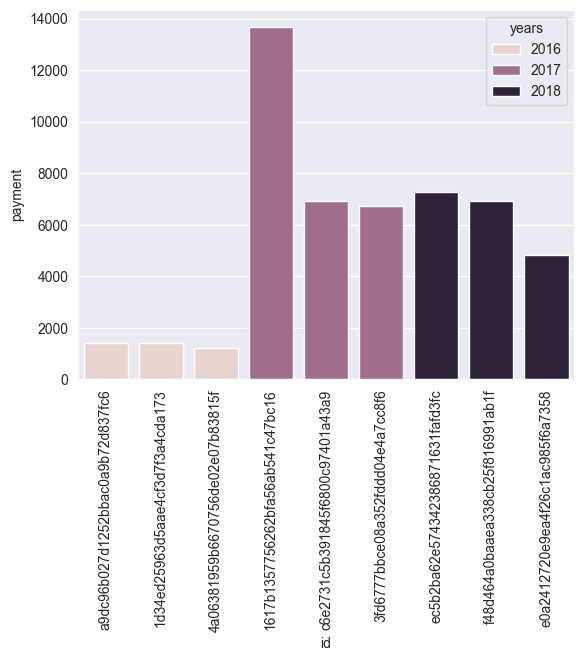

In [12]:
df.columns =["id","years","payment","rank"]
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()